<a href="https://colab.research.google.com/github/VIRU2341/alma-beetter-netflix/blob/main/Copy_of_NETFLIX_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - NETFLIX MOVIES AND TV SHOWS ANALYSIS



##### **Project Type**    - Unsupervised Machine Learning
##### **Contribution**    - Individual
##### **Project By -**    - Virendra Singh Rawat

# **Project Summary -**

Netflix is a subscription-based streaming service that allows the members to watch TV shows and movies on an internet-connected device.Depending on the plan, anyone can download TV shows and movies to the iOS, Android, or Windows 10 device and watch without an internet connection.If you're already a member and would like to learn more about using Netflix, visit Getting started with Netflix.Netflix content varies by region and may change over time. We can watch a variety of award-winning Netflix originals, TV shows, movies, documentaries, and more.We can watch Netflix through any internet-connected device that offers the Netflix app, including smart TVs, game consoles, streaming media players, set-top boxes, smartphones, and tablets. We can also watch Netflix on your computer using an internet browser. We can review the system requirements for web browser compatibility, and check our internet speed recommendations to achieve the best performance.Each Netflix plan determines the number of devices we can watch Netflix on at the same time and whether we can watch in High Definition (HD), Full High Definition (FHD), or Ultra High Definition (UHD).We can change your plan or cancel online at any time.

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Fixable which is a third-party Netflix search engine. It will be interesting to explore what all other insights can be obtained from the same dataset.

# **GitHub Link -**


https://github.com/VIRU2341/alma-beetter-netflix.git

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Fixable which is a third-party Netflix search engine. It will be interesting to explore what all other insights can be obtained from the same dataset.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import missingno

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

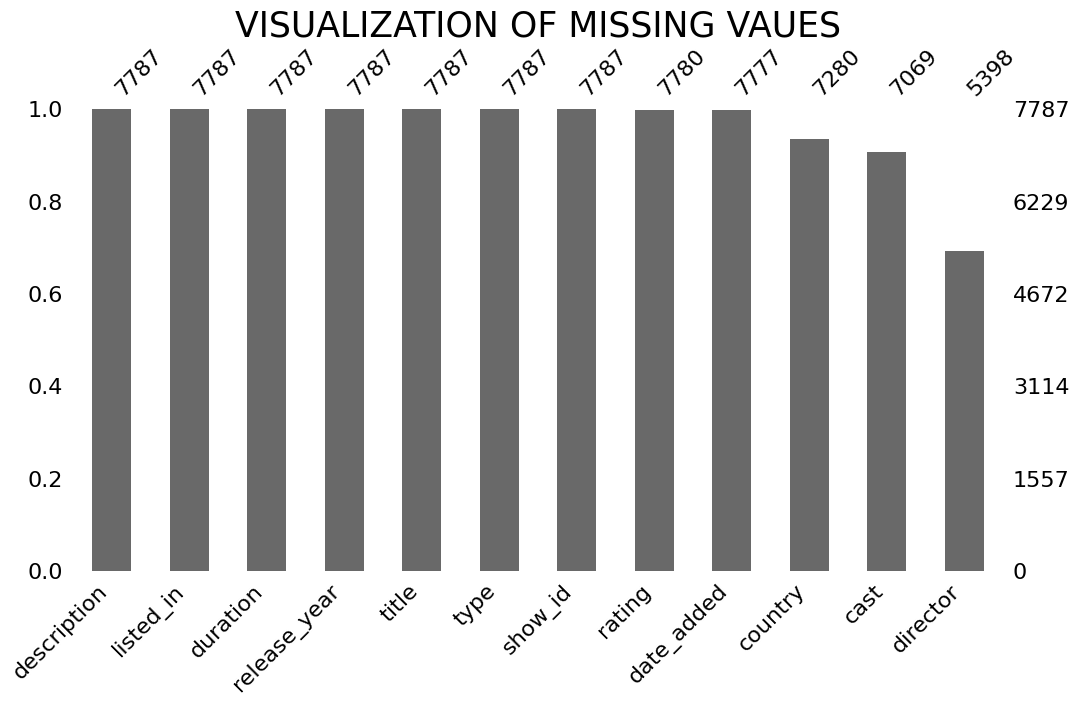

In [9]:
# Visualizing the missing values
missingno.bar(df,fontsize =16, sort = 'descending', figsize = (12,6))
plt.title("VISUALIZATION OF MISSING VAUES",fontsize=25)
plt.show()

### What did you know about your dataset?

From the above data we can see that there are 7787 rows and 12 columns.Most of the Values are Missing From Director Column and some of in Cast,Country and Date column.

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [14]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
pd.Series({col:df[col].unique() for col in df})

show_id         [s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11,...
type                                             [TV Show, Movie]
title           [3%, 7:19, 23:59, 9, 21, 46, 122, 187, 706, 19...
director        [nan, Jorge Michel Grau, Gilbert Chan, Shane A...
cast            [João Miguel, Bianca Comparato, Michel Gomes, ...
country         [Brazil, Mexico, Singapore, United States, Tur...
date_added      [August 14, 2020, December 23, 2016, December ...
release_year    [2020, 2016, 2011, 2009, 2008, 2019, 1997, 201...
rating          [TV-MA, R, PG-13, TV-14, TV-PG, NR, TV-G, TV-Y...
duration        [4 Seasons, 93 min, 78 min, 80 min, 123 min, 1...
listed_in       [International TV Shows, TV Dramas, TV Sci-Fi ...
description     [In a future where the elite inhabit an island...
dtype: object

## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  show_id is 7787 .
No. of unique values in  type is 2 .
No. of unique values in  title is 7787 .
No. of unique values in  director is 4049 .
No. of unique values in  cast is 6831 .
No. of unique values in  country is 681 .
No. of unique values in  date_added is 1565 .
No. of unique values in  release_year is 73 .
No. of unique values in  rating is 14 .
No. of unique values in  duration is 216 .
No. of unique values in  listed_in is 492 .
No. of unique values in  description is 7769 .


In [17]:
df["cast"]=df["cast"].fillna('unknown')
df["director"]=df["director"].fillna(0)
df["country"]=df["country"].fillna('unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace = True)

In [18]:
#df["date_added"]=pd.DatetimeIndex(df.date_added)
df["year"]=pd.DatetimeIndex(df["date_added"]).year
df["month"]=pd.DatetimeIndex(df["date_added"]).month
df.drop('date_added', axis=1, inplace=True)

In [19]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year', 'month'],
      dtype='object')

In [20]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year            0
month           0
dtype: int64

In [21]:
df.shape

(7777, 13)

### What all manipulations have you done and insights you found?

The manipulations are as follows

1.There are 7777 rows and 12 columns.

2.In the dataset there is no duplicated values are there.

3.In that dataset this column null value there are director,cast ,country,date_added which has been replaced by unknown.

4.Two new columns have been added for month and year.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Movie      5377
TV Show    2400
Name: type, dtype: int64


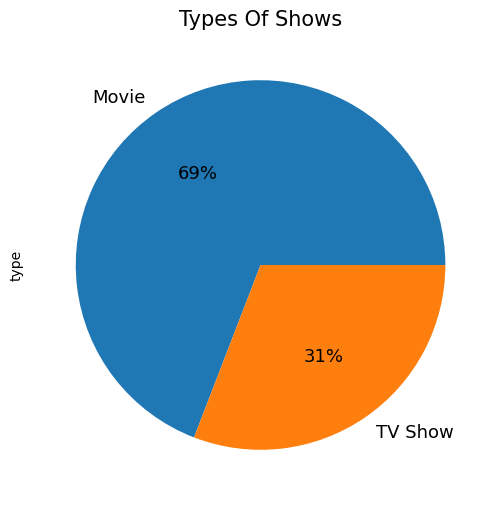

In [22]:
# Chart - 1 visualization code
show_type=df["type"].value_counts()
print(show_type)
# Chart - 1 visualization code
show_type.plot(kind='pie',autopct='%1.0f%%',figsize=(15,6),fontsize=13)
plt.title("Types Of Shows",fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is used to display the different values of a given variable.

##### 2. What is/are the insight(s) found from the chart?

From the above chart it can be seen clearly that there are more movies 69% than TV shows 31% in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart above shows that there are about 5372 movies and almost 2398 TV shows, with movies being the majority. There are more movie (69%) than TV shows (31%) in terms of title.

#### Chart - 2

United States                    2549
India                             923
United Kingdom                    396
Japan                             225
South Korea                       183
Canada                            177
Spain                             134
France                            115
Egypt                             101
Mexico                            100
Turkey                            100
Australia                          82
Taiwan                             78
Brazil                             72
Philippines                        71
Nigeria                            70
Indonesia                          70
United Kingdom, United States      64
Germany                            61
Name: country, dtype: int64


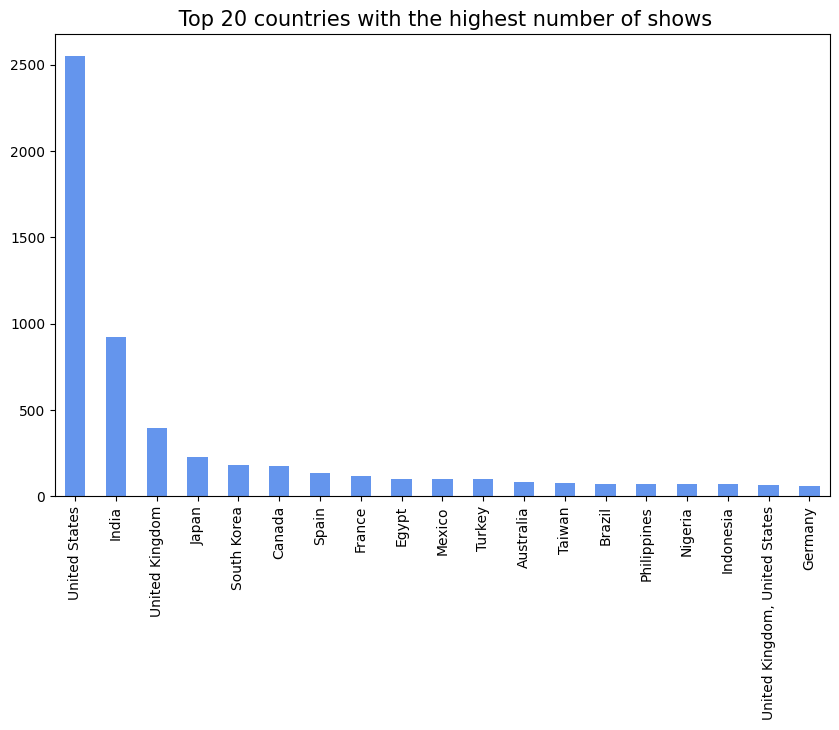

In [23]:
# Chart - 2 visualization code
# Top countries
country=df.country.value_counts()[:20]
del country['unknown']
print(country)
plt.figure(figsize=(10,5))
country.plot(kind="bar",color="cornflowerblue",figsize=(10,6))
plt.title(' Top 20 countries with the highest number of shows',fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot shows catergorical data as rectangular bars with the height of bars proportional to the value they represent.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see that top 20 countries with the highest number movies / TV shows in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above chart United States are the top one country of highest number movies / TV shows in the dataset than in second position is India.

#### Chart - 3

Text(0.5, 1.0, 'distribution by released year')

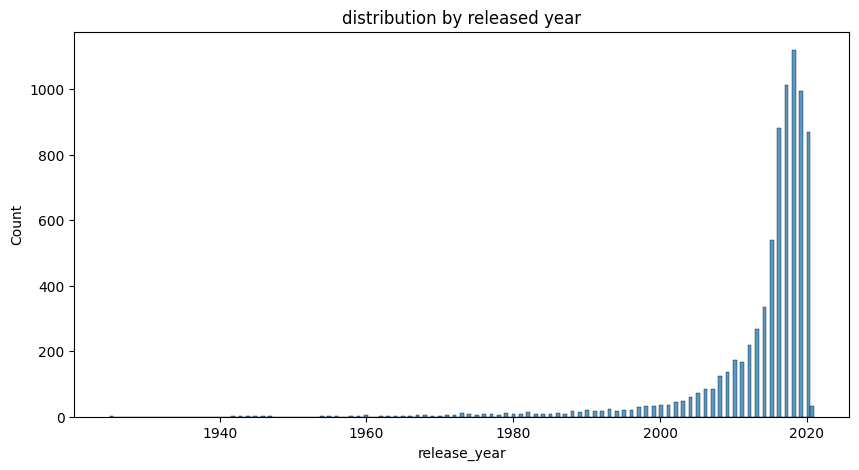

In [24]:
# Chart - 3 visualization code
plt.figure(figsize=(10,5))
sns.histplot(df['release_year'])
plt.title('distribution by released year')

##### 1. Why did you pick the specific chart?

A histogram is a graphical representation of the distribution of data. The histogram is represented by a set of rectangles, adjacent to each other, where each bar represent a kind of data.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we found release_year 2000 to 2020 more the the movie / tv show was released.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above chart it is clear that number of audience has increased from year 2000 to 2020.In last 4 to 5 years the audience is in peak.

#### Chart - 4

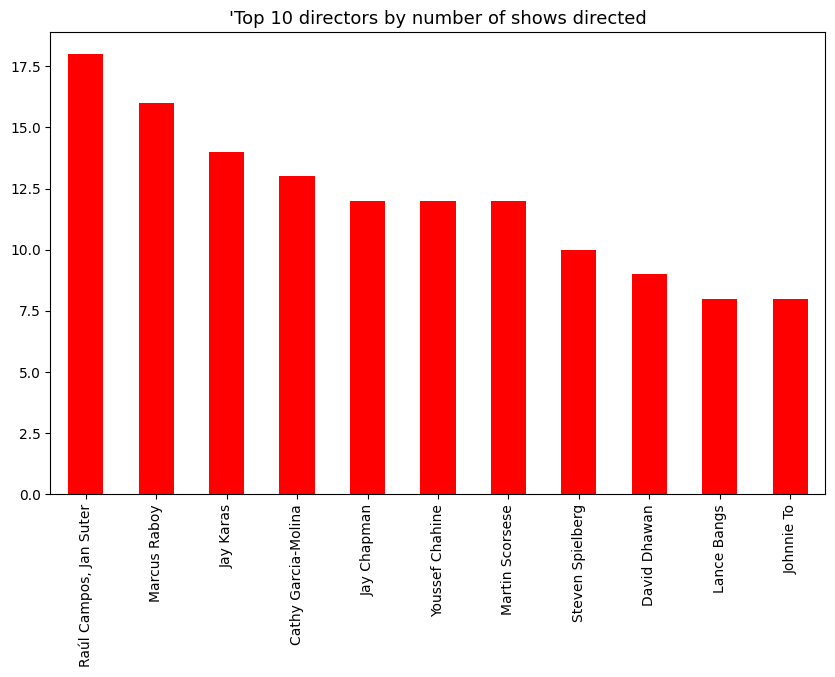

In [26]:
# Chart - 4 visualization code
director=df["director"].value_counts()[1:12]
director
director.plot(kind="bar",color='red',figsize=(10,6))
plt.title("'Top 10 directors by number of shows directed",fontsize=13)
plt.show()

##### 1. Why did you pick the specific chart?

A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable.

##### 2. What is/are the insight(s) found from the chart?

In this Bar plot there are showing Top 10 directors by number of shows directed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Raul Campos jan Suter are the top 1 director whereas Rayan Polito are top 10 director.

#### Chart - 5

<Axes: xlabel='rating', ylabel='count'>

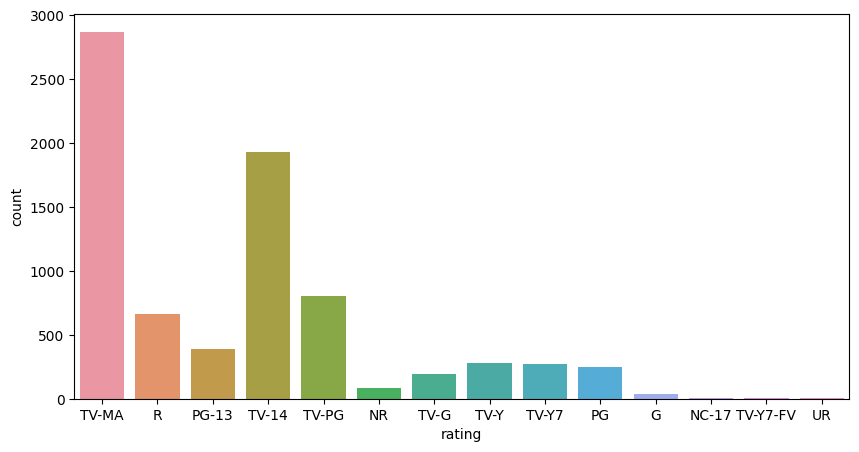

In [27]:
# Chart - 5 visualization code
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df)

##### 1. Why did you pick the specific chart?

countplot() method is used to Show the counts of observations in each categorical bin using bars.

##### 2. What is/are the insight(s) found from the chart?

In this plot we found all rating count. TV-MA is the highest rating and second highest is TV-14 and third highest is TV-PG rating.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

TV-MA are the top 1 rating whereas UR ratings are in top 10.

#### Chart - 6

Text(0.5, 1.0, 'Top 10 genres')

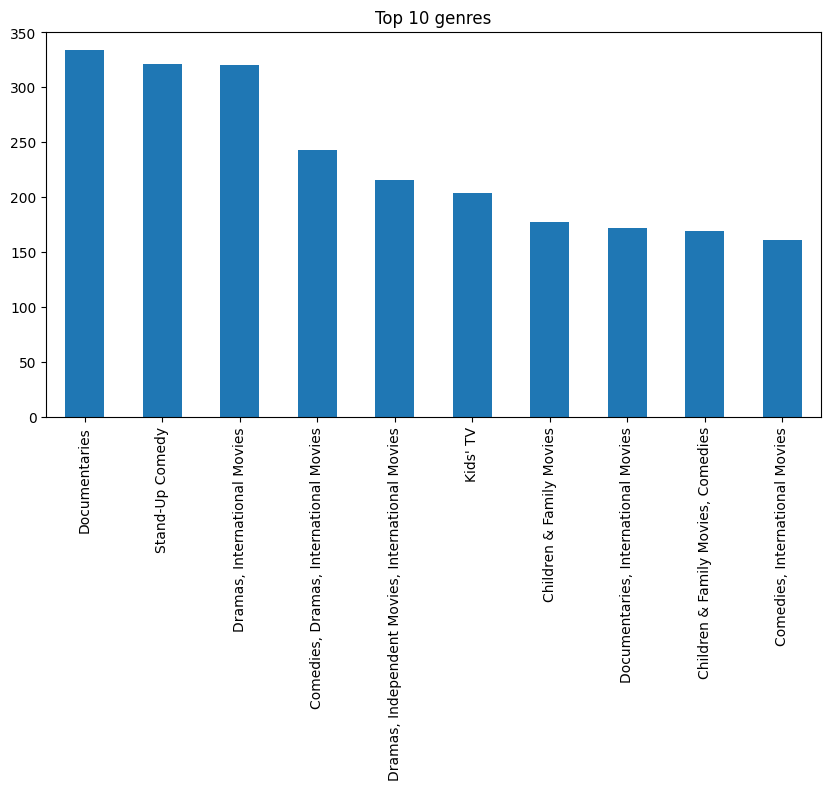

In [28]:
# Chart - 6 visualization code
plt.figure(figsize=(10,5))
df.listed_in.value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 genres')

##### 1. Why did you pick the specific chart?

A bar graph is a graphical representation of data in which we can highlight the category with particular shapes like a rectangle.

##### 2. What is/are the insight(s) found from the chart?

In this bar plot we found Dramas are large value_counts of shows and movies and Comedies are the second large value_counts of shows and Movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In this bar plot we found Dramas are large value_counts of shows and movies and Comedies are the second large value_counts of shows and Movies.Audience are watching the dramas ,comedies and the documentation shows and movies.

#### Chart - 7

1 Season     1608
2 Seasons     378
3 Seasons     183
90 min        136
93 min        131
94 min        125
91 min        125
95 min        119
92 min        118
97 min        117
Name: duration, dtype: int64


Text(0.5, 1.0, 'Number of seasons per TV show distribution')

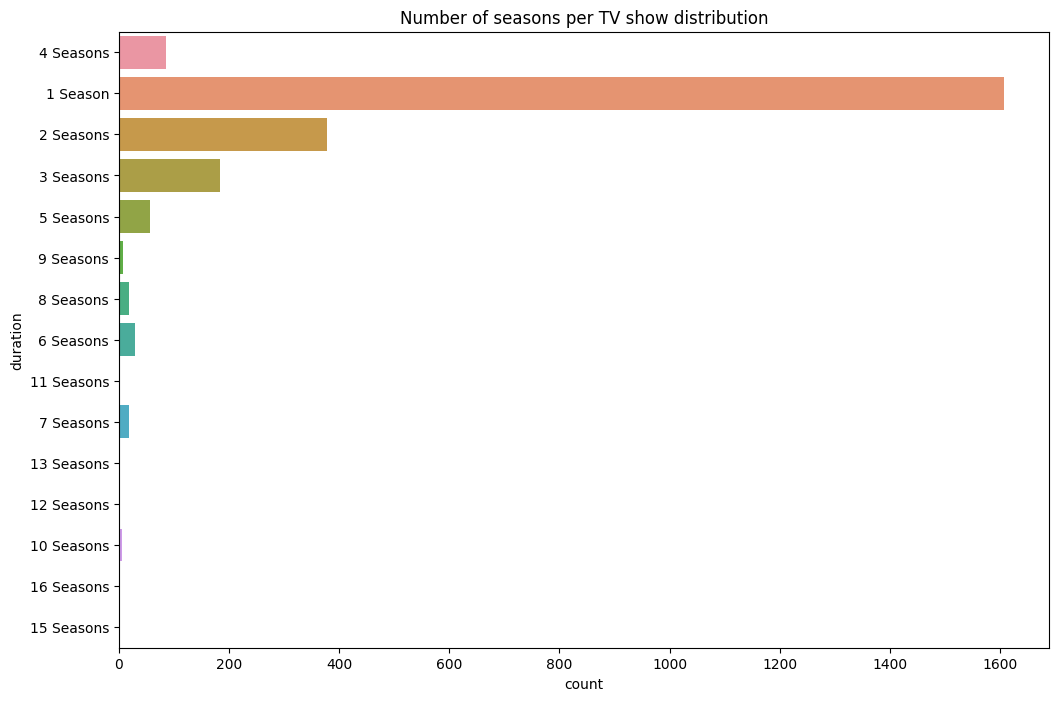

In [29]:
# Chart - 7 visualization code
duration=df['duration'].value_counts()[0:10]
print(duration)
# Seasons in each TV show
plt.figure(figsize=(12,8))
p = sns.countplot(y='duration',data=df[df['type']=='TV Show'])
plt.title('Number of seasons per TV show distribution')

##### 1. Why did you pick the specific chart?

A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.

##### 2. What is/are the insight(s) found from the chart?

From the above bar chart we found Number of per Seasons in each TV show count.first seasons are 1608 and second seasons are 378 and third seasons are 183.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The fiest season is the count is the highest 1608.The second season has 382 the third season has 184 and so on.

#### Chart - 8

Text(0.5, 1.0, 'Top 10 genres for movies')

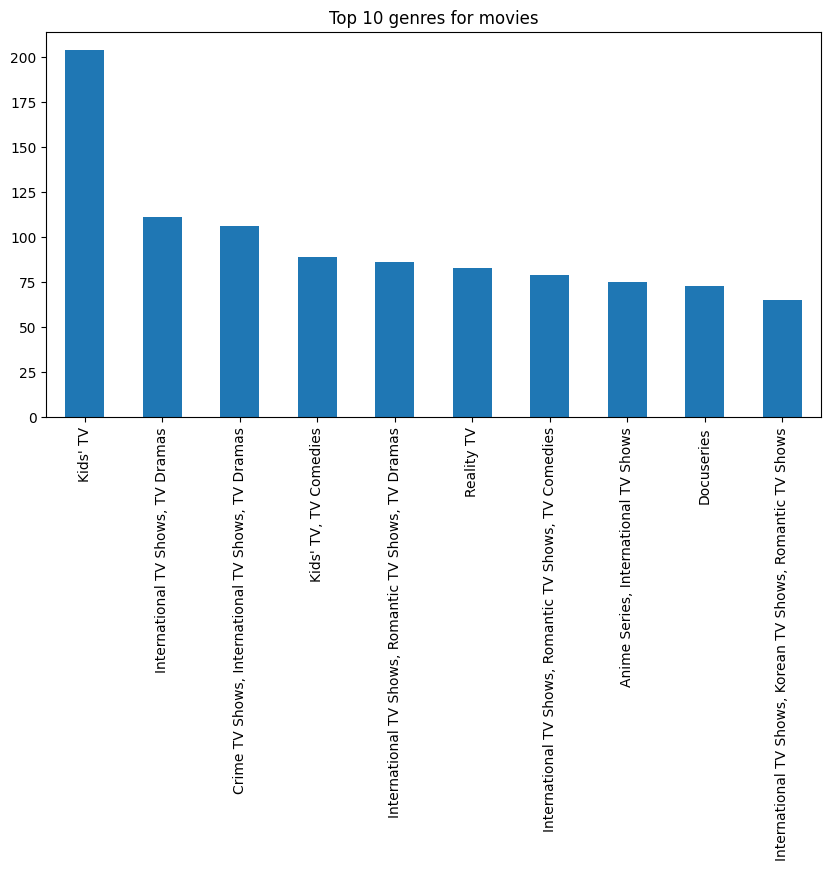

In [30]:
# Chart - 8 visualization code
# Top 10 genre for movies
plt.figure(figsize=(10,5))
df[df['type']=='TV Show'].listed_in.value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 genres for movies')

##### 1. Why did you pick the specific chart?

A bar plot shows is often used to compare between values of different categories in the data.

##### 2. What is/are the insight(s) found from the chart?

In this graph we found Top 10 genres for movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Kid's Shows are the highest number of genres type of TV shows and International TV Shows ,Crime TVShows and Kid's Shows are approximately same for generes type of TV shows.

#### Chart - 9

David Attenborough                                                                                                        18
Samuel West                                                                                                               10
Jeff Dunham                                                                                                                7
Kevin Hart                                                                                                                 6
Craig Sechler                                                                                                              6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath     6
Bill Burr                                                                                                                  5
Iliza Shlesinger                                                                                                           5


Text(0.5, 1.0, 'Actors who have appeared in highest number of movies')

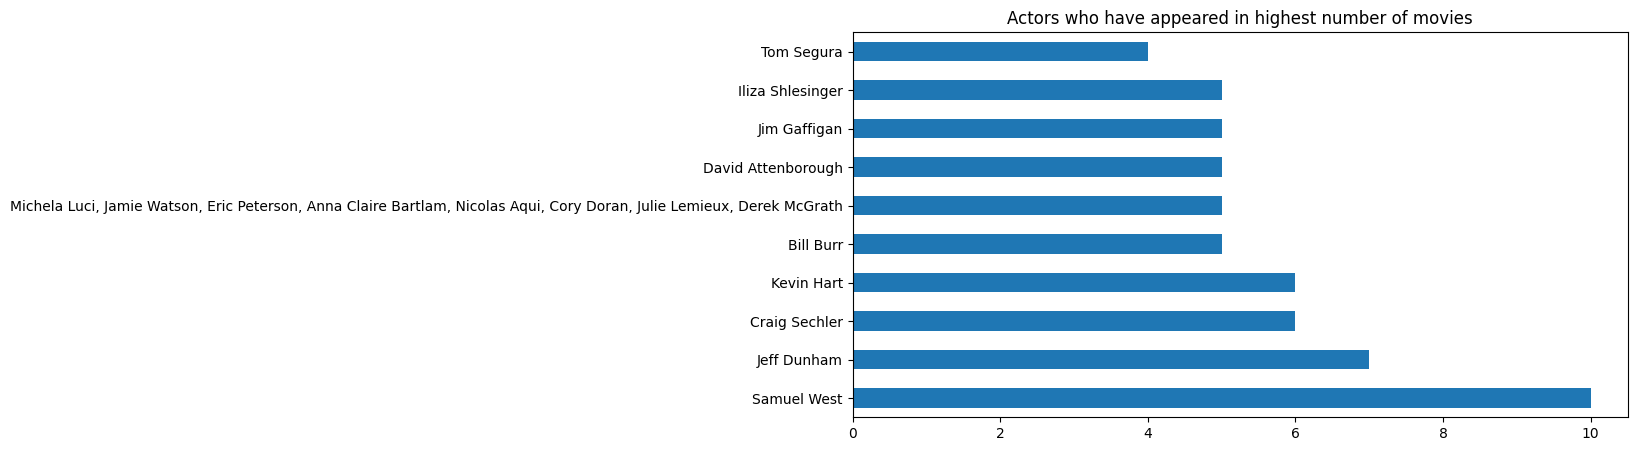

In [31]:
# Chart - 9 visualization code
cast=df['cast'].value_counts()[1:11]
print(cast)
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='Movie')].cast.value_counts()[1:11].nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of movies')

##### 1. Why did you pick the specific chart?

A bar plot shows is often used to compare between values of different categories in the data.

##### 2. What is/are the insight(s) found from the chart?

In this graph we found Top actors for movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Top one actor in movies are Samuel West and second highest actor are jeff Dunham and third highest actor of movies are Craig Sechler and Kevin Hart.

#### Chart - 10

Text(0.5, 1.0, 'Actors who have appeared in highest number of TV shows')

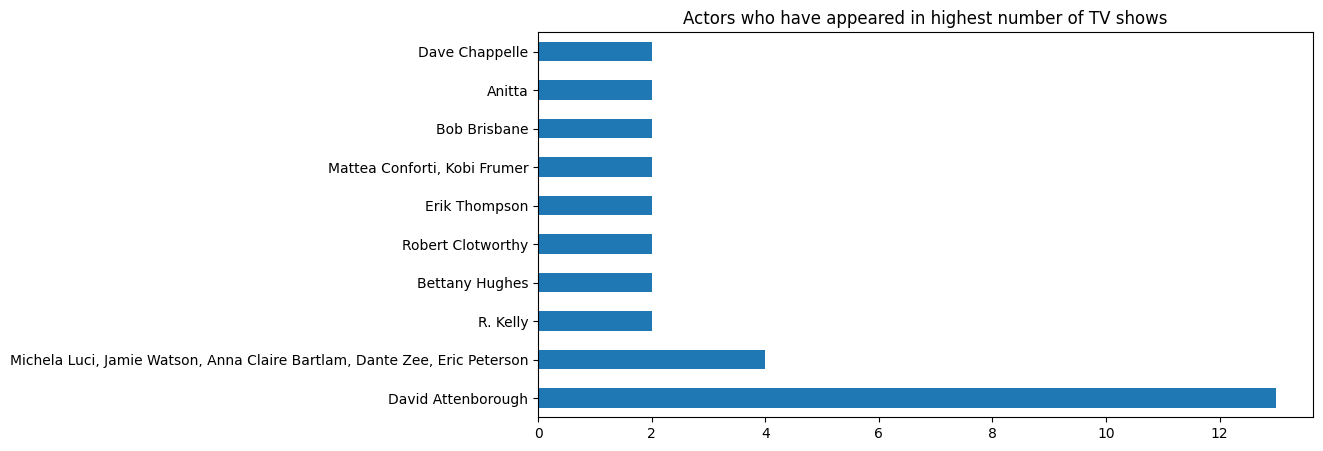

In [33]:
# Chart - 10 visualization code
# Top actors for TV shows
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='TV Show')].cast.value_counts()[1:11].nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of TV shows')

##### 1. Why did you pick the specific chart?

To count and compare the top actors for TV shows i use this bar chart.

##### 2. What is/are the insight(s) found from the chart?

In this graph we found Actors who have appeared highest number of TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Top one actor of TV Shows is David Attenborough and second highest actor in TV shows many are there like Michela Luci,Jamie Watson,Anna Claire Bartlam,Dante Zee and Eric peterson.

#### Chart - 11

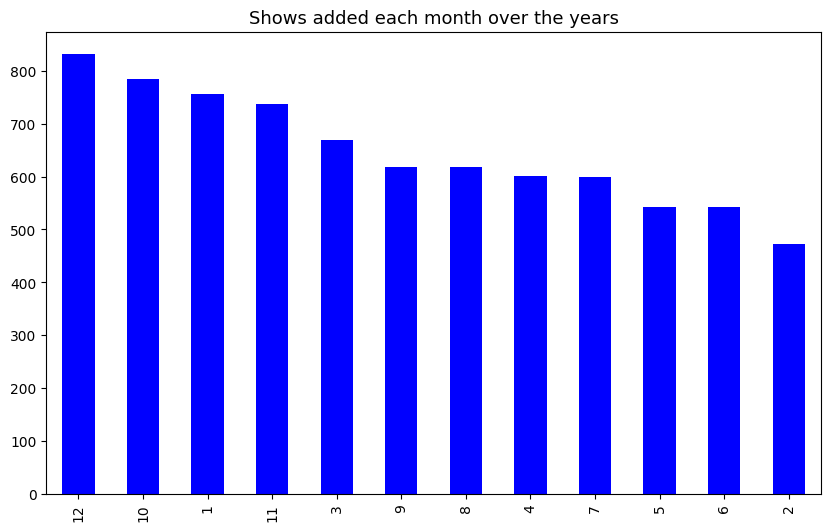

In [34]:
# Chart - 11 visualization code
# Number of shows added on different months
month=df['month'].value_counts()
month.head(12)
month.plot(kind="bar",color='blue',figsize=(10,6))
plt.title('Shows added each month over the years',fontsize=13)
plt.show()

##### 1. Why did you pick the specific chart?

A bar graph is a graphical representation of data in which we can highlight the category with particular shapes like a rectangle.

##### 2. What is/are the insight(s) found from the chart?

In this count plot we found Number of shows added on different months.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

December are the highest number of shows added on and Octobor are the second highest number of shows added on. we see all month minority difference between them.

#### Chart - 12

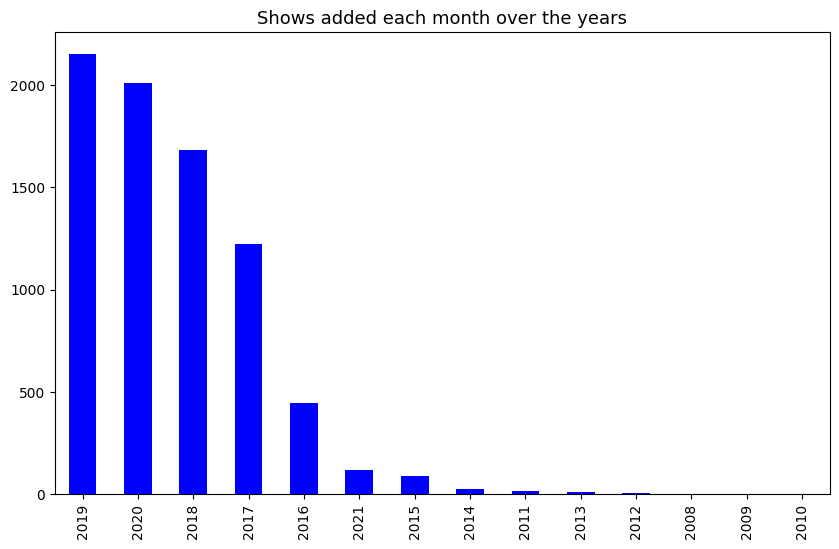

In [35]:
# Chart - 12 visualization code
# Number of shows added on different years
year=df['year'].value_counts()
year.head(14)
year.plot(kind="bar",color='blue',figsize=(10,6))
plt.title('Shows added each month over the years',fontsize=13)
plt.show()

##### 1. Why did you pick the specific chart?

A bar graph is a graphical representation of data in which we can highlight the category with particular shapes like a rectangle.

##### 2. What is/are the insight(s) found from the chart?

In this count plot we found Number of shows added on different years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

2019 are the highest number of shows added on and 2020 are the second highest number of shows added on and 2018 are the third highest number of shows added on.

#### Chart - 13

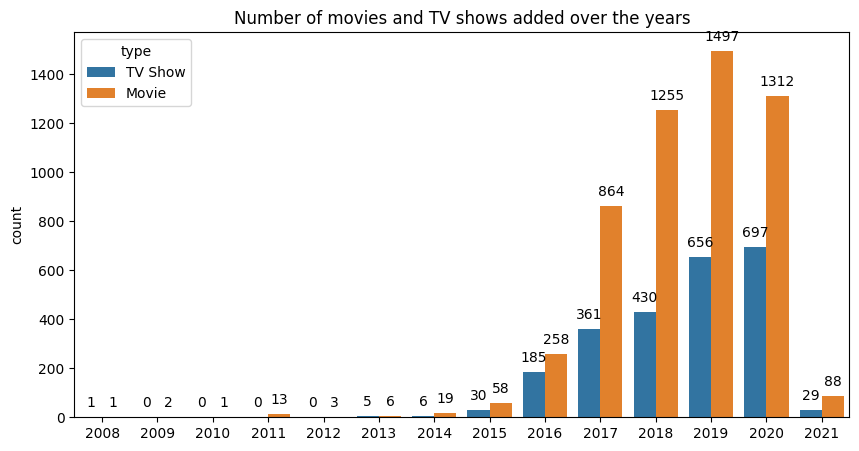

In [36]:
# Chart - 13 visualization code
# Number of movies and TV shows added over the years
plt.figure(figsize=(10,5))
p = sns.countplot(x='year',data=df, hue='type')
plt.title('Number of movies and TV shows added over the years')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


##### 1. Why did you pick the specific chart?

A bivariate plot graphs the relationship between two variables that have been measured on a single sample of subjects.

##### 2. What is/are the insight(s) found from the chart?

In this graph we found that Number of movies and TV shows added over the years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From above insights 2019 have 1497 movies and 656 TV shows are there whereas in 2020 year there are 1312 movies and 697 TV shows and in 2018 year 1255 movies and 430 TV shows are there.

#### Chart - 14 - Correlation Heatmap

In [37]:
# Correlation Heatmap visualization code
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

In [38]:
df['principal_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['principal_country'].head()

df['principal_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['principal_country'].head()

country_order = df['principal_country'].value_counts()[:11].index
content_data = df[['type', 'principal_country']].groupby('principal_country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

df['count'] = 1
data = df.groupby('principal_country')[['principal_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['principal_country']

Flix_df_heatmap = df.loc[df['principal_country'].isin(data)]
Flix_df_heatmap = pd.crosstab(Flix_df_heatmap['principal_country'], Flix_df_heatmap['rating'],normalize = "index").T
Flix_df_heatmap

<ipython-input-38-14974e57169c>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = df.groupby('principal_country')[['principal_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]


principal_country,Canada,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States,unknown
rating,,,,,,,,,,
Adults,0.467181,0.627551,0.259414,0.368644,0.764228,0.463918,0.797619,0.526042,0.489051,0.320158
Kids,0.150579,0.086735,0.015690,0.008475,0.016260,0.046392,0.035714,0.078125,0.074731,0.169960
Older Kids,0.220077,0.112245,0.163180,0.275424,0.089431,0.123711,0.053571,0.184028,0.196038,0.235178
Teens,0.027027,0.030612,0.004184,0.012712,0.016260,0.000000,0.017857,0.071181,0.098366,0.005929
Young Adults,0.135135,0.142857,0.557531,0.334746,0.113821,0.365979,0.095238,0.140625,0.141814,0.268775


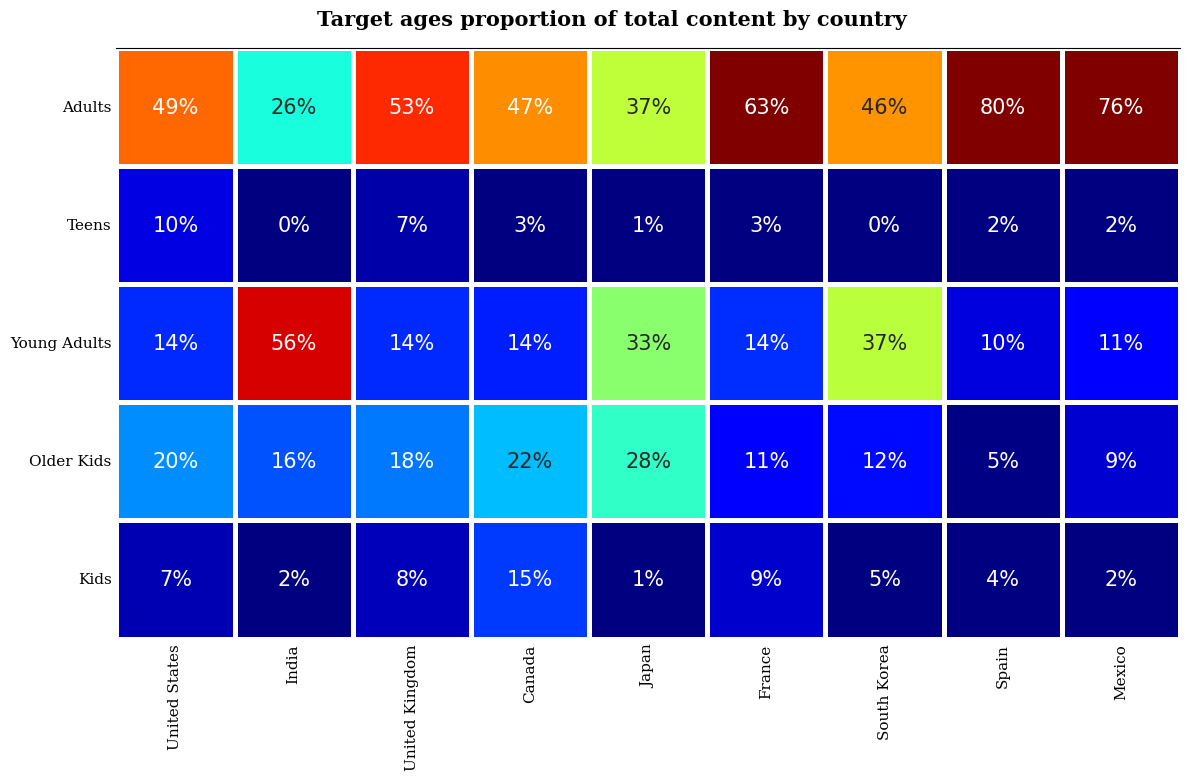

In [39]:
# Correlation Heatmap visualization code
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids']
sns.heatmap(Flix_df_heatmap.loc[age_order,country_order2],cmap="jet",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='2.0%',vmax=.6,vmin=0.05,annot_kws={"fontsize":15})

ax.spines['top'].set_visible(True)

fig.text(.76,.765, 'Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=15,ha='right')

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Correlation heatmaps was used to find potential relationships between variables and to understand the strength of these relationships.

##### 2. What is/are the insight(s) found from the chart?

In this correlation Heatmap graph we found the Target ages proportion of total content by country.In USA percentage of adults is max i,e 49% whereas in India the percentage of young adults is max i,e 56%.Similarly in Top 9 country the percentage of audience of different ages is given in the map.

#### Chart - 15

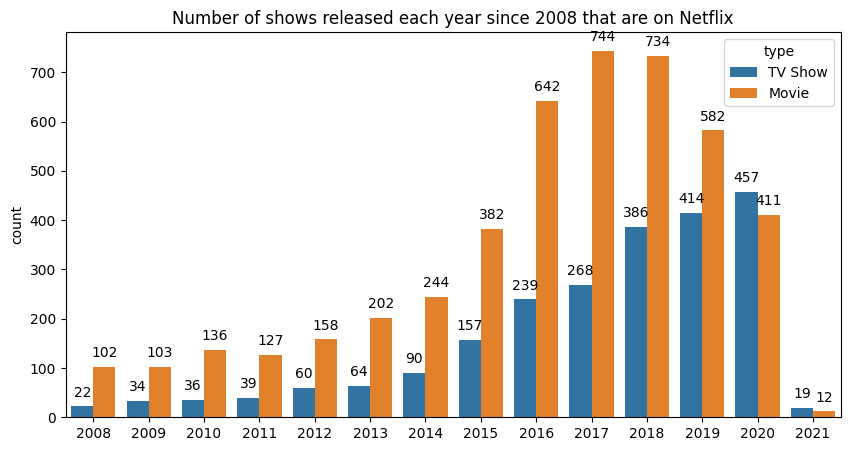

In [40]:
#  visualization code
# Number of shows released each year since 2008
order = range(2008,2022)
plt.figure(figsize=(10,5))
p = sns.countplot(x='release_year',data=df, hue='type',
                  order = order)
plt.title('Number of shows released each year since 2008 that are on Netflix')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

##### 1. Why did you pick the specific chart?

A bivariate plot graphs the relationship between two variables that have been measured on a single sample of subjects.

##### 2. What is/are the insight(s) found from the chart?

In this graph we found that Number of shows released each year since 2008 that are on Netflix.Before 2019 Movies were the highest number of released but in 2020 and 2021 TV shows are the highest number of released.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

We have drawn many interesting inferences from the dataset Netflix titles here is a summary of the few of them:

1.The most content type on Netflix is movies.

2.The popular streaming platform started gaining traction after 2014. Since then, the amount of content added has been increasing significantly.

3.The country by the amount of the produces content is the United States.

4.The most popular director on Netflix , with the most titles, is Jan Suter.

5.Kids tv is a genre that is mostly in Netflix.

6.The largest count of Netflix content is made with a “TV-14” rating.

7.The most popular actor on Netflix TV Shows based is David Atternborough.

8.The most popular actor on Netflix movieis is Samuel West.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***